### Name: Yi Jie Lim
### Student Number: 20104720

# Python Workbook 7 - Integration

## Introduction

In this practical we will use Python to study integration and some of its applications (average value, area, etc).

## Mathematical Concepts

 * The __indefinite integral__ (or __anti-derivative__) of a function, $f(x)$, is the function $F(x)$ defined by
$$
   \frac{dF}{dx} = f(x),
$$
where the function $F(x)$ is found by integrating $f(x)$
$$
 F(x) = \int f(x) dx + C      \implies
$$
where $C$ is an arbitrary constant called an __integration constant__.


 * The __definite integral__ of a function, $f(x)$, is the *number*, $A$, defined by
$$
    A = \int_a^b f(x) dx
$$
and **if** $f(x)\ge 0$ then the definite integral is equal to the area between the function and the x-axis over the interval $x=a$ to $x=b$.


### Python Functions

 * In this workbook we will use the following functions from the  symbolic python module __sympy__:
    * __symbols__ or (better) __Symbol__ used to define a symbol.
    * __Function__ to define a symbolic function.
    * __limit(f, t, t0)__ to compute the limit of the expression, __f__, as the variable __t__ tends towards __t0__.
    * __diff(f, t)__ to differentiate the function, __f__, with respect to variable __t__.
    * __display__ to dispaly an experssion using mathematics notation.
    * __integrate(f,t)__ to calculate the indefinite integral of $f(t)$.
    * __integrate(f,(t,a,b))__ to calculate the definite integral of $f(t)$ over the interval $a\leq t\leq b$.
and standard methods.
    * __subs(exp_old,exp_new)__ to substitute sub-expresion __exp_old__ with __exp_new__.
    * __solve(eqn,x)__ finds all values of $x$ which make $eqn=0$.

In [ ]:
# for numeric work
import numpy as np
import matplotlib.pyplot as plt

# for symbolic work
from sympy import *
from sympy.plotting import plot, plot_parametric
from sympy import init_printing
init_printing()


## Example 1 - Indefinite Integration (or Anti-derivatives)

Given the function
$$
f(x)=x^3+x^2+1
$$
answer the following:

1. Find the indefinite integral of $f(x)$.

2. Check that the derivative of this integral returns $f(x)$.

### Part 1:

To answer this we must first define the __symbol__ $x$ in the usual way. We are also going to require a second symbol $C$, to denote the arbitrary __integration constant__.

In [ ]:
x = symbols('x')
C = symbols('C')

Next we define the function $f(x)$:

In [ ]:
f=x**3+x**2+1

To find the indefinite integral of $f$ we use the __sympy__ function __integrate(f,x)__.

This function requires __two arguments__:

* The funciton $f$ we wish to integrate

* The varibale $x$ we wish to integrate with respect to

In [ ]:
integrate(f,x)

 4    3    
x    x     
── + ── + x
4    3     

Notice that the integral does not contain an arbitrary integration constant. We must add this manually, to give the following __anti-derivative__

In [ ]:
F=integrate(f,x)+C
F

     4    3    
    x    x     
C + ── + ── + x
    4    3     

### Part 2

Since  **F** as defined above is an anti-derivative of $f$, this means that if we  __differentiate F__  we should get back __f__.

We can check this using the familiar __sympy__ function __diff()__

In [ ]:
diff(F,x)

 3    2    
x  + x  + 1

Hence when we differentate **F** it returns the original function __f__.

## Exercise 1

Given the functions
$$
g(t)=e^{2t}\sin(\pi t)\\
h(s)=\ln(s)
$$
answer the following:

1. Declare symbols $s$ and $t$


2. Find the anti-derivative of $g(t)$ and $h(s)$


3. Differentiate these anti-derivatives and ensure this returns the original function, in each case.

__Note:__ The function $e^{t}$ is written in Python as __exp(t)__. The function $\ln(s)$ is written in Python as __log(s)__

In [ ]:
t = symbols('t')
s = symbols('s')
C = symbols('C')

In [ ]:
g = exp(2*t)*sin(pi*t)
h = log(s)

In [ ]:
integrate(g,t)

   2⋅t               2⋅t         
2⋅ℯ   ⋅sin(π⋅t)   π⋅ℯ   ⋅cos(π⋅t)
─────────────── - ───────────────
          2                 2    
     4 + π             4 + π     

In [ ]:
integrate(h,s)

s⋅log(s) - s

In [ ]:
G=integrate(g,t)+C
G

       2⋅t               2⋅t         
    2⋅ℯ   ⋅sin(π⋅t)   π⋅ℯ   ⋅cos(π⋅t)
C + ─────────────── - ───────────────
              2                 2    
         4 + π             4 + π     

In [ ]:
H=integrate(h,s)+C
H

C + s⋅log(s) - s

In [ ]:
diff(G,t)

   2⋅t             2  2⋅t         
4⋅ℯ   ⋅sin(π⋅t)   π ⋅ℯ   ⋅sin(π⋅t)
─────────────── + ────────────────
          2                 2     
     4 + π             4 + π      

In [ ]:
diff(H,s)

log(s)

## Example 2 - Definite Integration

Evaluate the following __definite integal__

$$
\int_{-2}^{1} (x^2+1) dx.
$$

This can be achieved directly, by including an extra pair of parameters in the __integrate(f,x)__ function:

* First we define a function to represent the __integrand__ (just to make it easier to work with)

In [ ]:
p=x**2+1

* Next we integrate this function between the __limits__ -2 and 1 as follows:

In [ ]:
integrate(p,(x,-2,1))

6

* We could also do this the __pen and paper__ way, first getting the __anti-derivative__ of $p$, and then finding the __difference in values__ at the upper and lower limits of integration, i.e.

In [ ]:
P=integrate(p,x)+C
P

     3    
    x     
C + ── + x
    3     

In [ ]:
P.subs(x,1)-P.subs(x,-2)

6

## Interpretation of the Integral

* To emphasise the significance of the integral we will create some of our plots using __matplotlib__ in this workbook.


* __matplotlib__ is a numerical package, and __cannot__ work with symbols and symbolic functions defined using __sympy__


* For this reason, we have to be careful when creating variables and functions for matplotlip, so they do not clash with symbolic symbols and functions.


* In this workbook, all numerical variables will be followed by __**n**__ (for numerical), so for example **xn** is the __numerical__ version of **x**.

In [ ]:
xn=np.linspace(-3,2)

def pn(xn):
    return xn**2+1

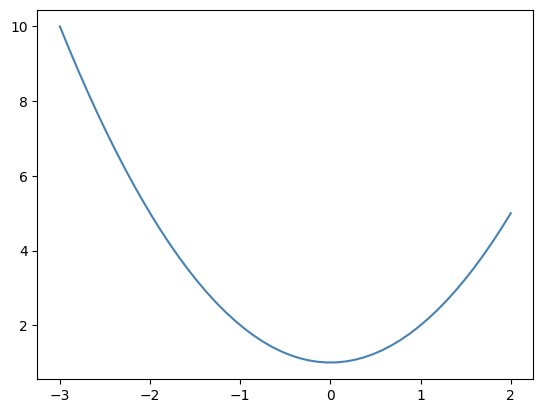

In [ ]:
plt.plot(xn,pn(xn),color='steelblue');

* This is a plot of the function $p$, and we see that the $x$-interval of the plot is just slightly larger that than the interval of integration.

* To highlight the interpretation of the integral, we add a vertical line from $(-2,0)$ to $(-2,p(-2))$ and another from $(1,0)$ to $(1,p(1))$.

* To plot the first vertical line we use __plt.plot([-2,-2],[0,pn(-2)])__. The plot lists all $x$-coordinates first then all $y$-coordinates

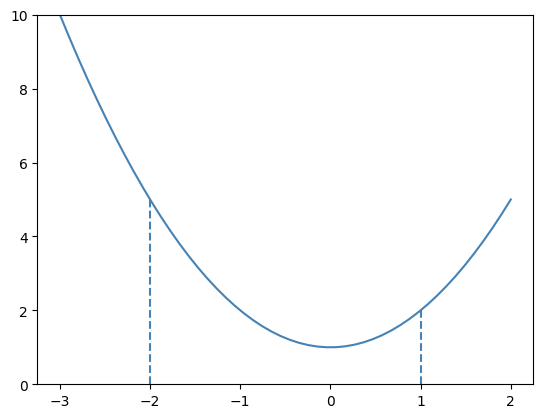

In [ ]:
plt.plot(xn,pn(xn),color='steelblue')
plt.plot([-2,-2],[0,pn(-2)],color='steelblue',linestyle='--')
plt.plot([1,1],[0,pn(1)],color='steelblue',linestyle='--')
plt.ylim(0,10);

* The intergal $\int_{-2}^{1}p(x)dx$ is the area between the two vertical lines and between the $x$-axis and the blue curve.

* To indicate this we can use the function __plt.text(-0.75,0.5,'Area=6')__, which places the text __Area=6__ at the point __(-0.75,0.5)__ on the plot

Text(-0.75, 0.5, 'Area=6')

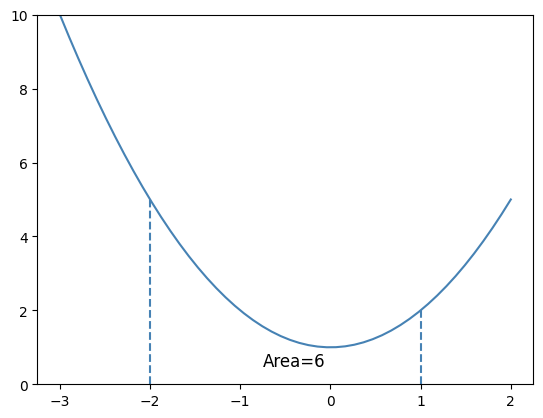

In [ ]:
plt.plot(xn,pn(xn),color='steelblue')
plt.plot([-2,-2],[0,pn(-2)],color='steelblue',linestyle='--')
plt.plot([1,1],[0,pn(1)],color='steelblue',linestyle='--')
plt.ylim(0,10)
plt.text(-0.75,0.5,'Area=6',size=12)

## Exercise 2

Given the function
$$
m(x)=x^2+\frac{1}{x^2}
$$
answer the following:

1. Evaluate the definite integal
$$
\int_{1}^{3}m(x)dx
$$
by the using one of the methods outlined in __Example 2.__



2. Create a plot showing the graph of $m(x)$ and indicating the area calculated in the integral above. You will have to select apropriate $y$-limits for the plot and find an apropriate location to place any text.

In [ ]:
m=x**2+1/x**2

In [ ]:
integrate(m,(x,1,3))

28/3

In [ ]:
M=integrate(m,x)+C
M

     3    
    x    1
C + ── - ─
    3    x

In [ ]:
M.subs(x,3)-M.subs(x,1)

28/3

In [ ]:
xn=np.linspace(0,4)

def mn(xn):
  return xn**2+1/xn**2

<ipython-input-56-dcd67366ba34>:4: RuntimeWarning: divide by zero encountered in divide
  return xn**2+1/xn**2


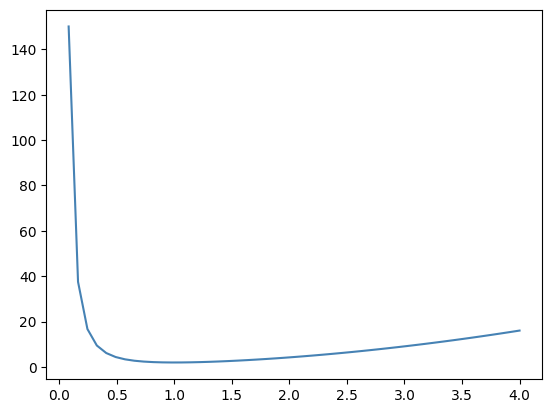

In [ ]:
plt.plot(xn,mn(xn),color='steelblue');

<ipython-input-56-dcd67366ba34>:4: RuntimeWarning: divide by zero encountered in divide
  return xn**2+1/xn**2


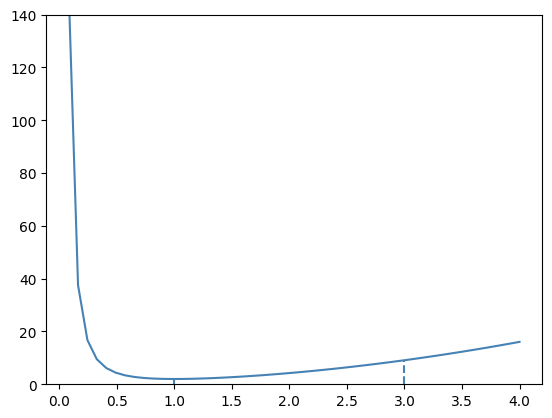

In [ ]:
plt.plot(xn,mn(xn),color='steelblue')
plt.plot([1,1],[0,mn(1)],color='steelblue',linestyle='--')
plt.plot([3,3],[0,mn(3)],color='steelblue',linestyle='--')
plt.ylim(0,140);

<ipython-input-56-dcd67366ba34>:4: RuntimeWarning: divide by zero encountered in divide
  return xn**2+1/xn**2


Text(1.75, 2.25, 'Area 9')

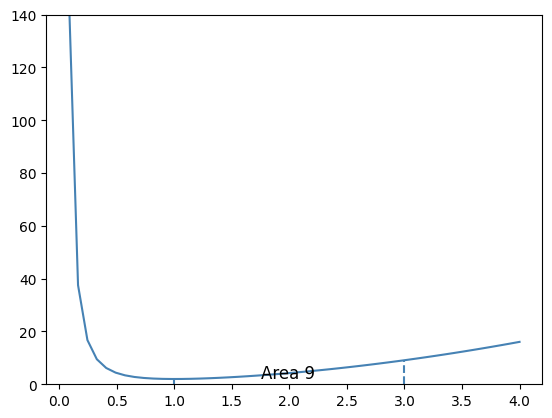

In [ ]:
plt.plot(xn,mn(xn),color='steelblue')
plt.plot([1,1],[0,mn(1)],color='steelblue',linestyle='--')
plt.plot([3,3],[0,mn(3)],color='steelblue',linestyle='--')
plt.ylim(0,140);
plt.text(1.75,2.25,'Area 9',size=12)

# Applications of Integration

## Example 3

An object is moving so that its speed after t minutes is
$$
v(t) = 1+4t+3t^2
$$
meters per minute.

1. Find a general formula for the displacement, if the displacement at $t=1$ is 25 meters.

2. Hence, find the distance travelled between $t=1$ and $t=5$

__Note:__ Recall that displacement and velocity are related  by
$$
 v(t)=\frac{ds}{dt}\quad
 \Rightarrow\quad s(t)=\int v(t)dt
$$




### Part 1

#### Step 1 - Define a symbol for time


In [ ]:
t=symbols('t')

#### Step 2 - Write an expression for $v(t)$


In [ ]:
v=1+4*t*3*t**2

#### Step 3 - Find the _indefinite_ integral of $v(t)$ to find the general formula for s


In [ ]:
s=integrate(v,t)+C
s

       4    
C + 3⋅t  + t

#### Step 4 - Solve for $c$

* We know that at $t=1$ then $s=25$.


* Finding an expression for $s$ at $t=1$ we use __subs()__ as follows:

In [ ]:
s1=s.subs(t,1)
s1

C + 4

* Now we use __sovle(s1-25,c)__ to see which value of $c$ gives an initial displacement of $25$ meters  

In [ ]:
solve(s1-25,C)

[21]

Hence, the actual formula for the displacement is given by

In [ ]:
s=integrate(v,t)+21
s

   4         
3⋅t  + t + 21

### Part 2 -Find the _definite_ integral of $v(t)$ when $t$ is between 1 and 5 minutes.
This gives the total distance travelled in that time interval

In [ ]:
D=integrate(v,(t,1,5))
D

1876

Hence the distance travelled between $t=1$ and $t=5$ is $1876$ meters.

## Exercise 3

A body starts from __rest__  with an acceleration
$$
 a(t)=\frac{dv}{dt}=\frac{d^{2}p}{dt^2}=-2.5\cos(30t),
$$
where $a$ is accleration, $v$ is velocity and $p$ is position.

#### Part 1- Write a function for $a(t)$, and integrate once to give $v(t)$.

In [ ]:
t = symbols('t')

In [ ]:
a=-2.5*cos(30*t)

In [185]:
v=integrate(a,t)
v

-0.0833333333333333⋅sin(30⋅t)

#### Part 2 - Use solve to find the time $t_1$ when $v(t_1)=2.3$m/s.

In [186]:
t1 = solve(v-2.3,t)

In [187]:
t1

[-0.0523598775598299 + 0.133687820141637⋅ⅈ, 0.15707963267949 - 0.1336878201416
37⋅ⅈ]

#### Part 3 - Integrate $v(t)$, the answer from Part 1, to find an expression for the position $p(t)$.

In [188]:
p=integrate(v,t)

In [189]:
p

0.00277777777777778⋅cos(30⋅t)

#### Part 4 - Use .subs() to find the position of the particle at time $t_1$ found in Part 2.

In [194]:
pt1 = p.subs(t,t1[0])

In [195]:
pt1

-1.23289403141875e-17 + 0.0766163280795619⋅ⅈ

## Example 4

Recall that given, two functions, $f$ and $g$, with $f(x)\ge g(x)$ over an interval $x=a$ to $x=b$ then the area between the two functions is given by
$$
    \int_a^b \big[f(x)-g(x)\big] dx.
$$


#### Steps for finding this area

 1. Define functions, $f$ and $g$ to represent each curve. (__Note:__ Make sure $f$ is the __upper function__)
    
 2. Determine the points of intersection of the curves - these are the integration limits $a$ and $b$.

 3. Determine the required area using definite integration.

 4. Plot the curves and the shaded area using __matplotlib__.

#### Part 1 - Define the functions $f$ and $g$


In [ ]:
f=-x**2+6
g=x**2-2*x+2

#### Part 2 - Use __solve(f-g,x)__ to find points of intersection of the curves


In [ ]:
L=solve(f-g,x)
L

[-1, 2]

These are the limits of integration, and we cal call an individual limit using the index notation __L[0]__ and __L[1]__.

#### Part 3 - Integrate $f-g$ between these two points of interestion.

In [ ]:
integrate(f-g,(x,L[0],L[1]))

9

Hence, the area between the two curves is $9$ square units.

#### Part 4 - Plotting the functions and area

* Since we are using __matplotlib__ to plot these functions, we define a numerial variable **xn** and numerical functions **fn** and **gn**.

In [ ]:
xn=np.linspace(-2,3,251)
## We make xn big enough to contain the intersction points found in Part 2

In [ ]:
fn=-xn**2+6
## Define a numerical version of f using the numerical xn

In [ ]:
gn = xn**2-2*xn +2
## Define a numerical version of g using the numerical xn

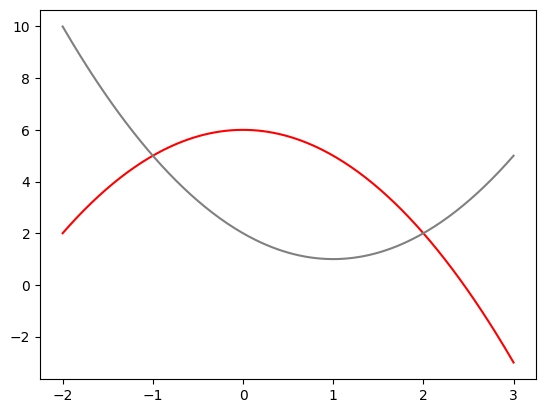

In [ ]:
plt.plot(xn,fn,color='red')
plt.plot(xn,gn,color='gray')

* To shade the area, we can use the function __fill_between()__ as follows:

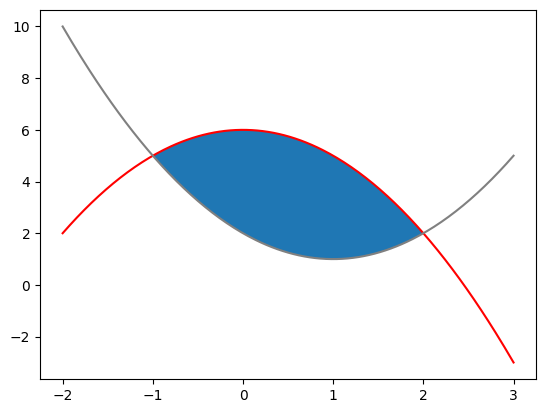

In [ ]:
plt.plot(xn,fn,color='red')
plt.plot(xn,gn,color='gray')
plt.fill_between(xn,fn,gn, where= fn>=gn)

* We use the option __where= fn(xn)>=gn(xn)__ to indicate we only want to fill the area where $f\geq g$.

## Exercise 4

Determine the size of the shaded area in the following diagram

![](http://bestmaths.net/online/files/8213/8655/6257/Y12_Area_under_Curves_09.gif)


#### Part 1 - Define the funcitons $y_1$ and $y_2$

In [ ]:
y1=x**2

In [ ]:
y2=2*x-x**2

#### Part 2 - Use .solve() to find the points of intersection of __$y_1$__ and __$y_2$__

In [ ]:
Z = solve(y1-y2,x)

In [ ]:
Z

[0, 1]

#### Part 3 - Determine the area by integrating  $y_1-y_2$ between these two points

In [ ]:
integrate(y1-y2,(x,Z[0],Z[1]))

-1/3